In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from termcolor import colored
from ast import literal_eval
import os

In [2]:
def combine_data():
    # Specify the folder path where your CSV files are located
    folder_path = '../../../data'
    
    # Get a list of all CSV files in the folder
    csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')  and "[" in file]
    
    # Initialize an empty DataFrame to store the combined data
    combined_df = pd.DataFrame()
    
    # Loop through each CSV file and concatenate its data to the combined DataFrame
    for csv_file in csv_files:
        file_path = os.path.join(folder_path, csv_file)
        df = pd.read_csv(file_path)
        combined_df = pd.concat([combined_df, df], ignore_index=True)
        
    filter_down = 4
    combined_df = combined_df[combined_df['area'] > filter_down]
    return combined_df
    # Display the combined DataFrame
df_combined = combine_data()
df_combined.head()

,id,area,centroid,rectangle
0,1,28,"(3, 1)","((0, 0), (8, 4))"
1,2,583,"(44, 5)","((18, 0), (72, 14))"
2,3,371,"(589, 5)","((568, 0), (608, 16))"
3,4,4165,"(865, 70)","((829, 0), (900, 136))"
4,5,1577,"(937, 15)","((911, 0), (972, 41))"


In [3]:
df_combined.shape

(98428, 4)

# Area

## Plotting data filtred with threshold

### Cutting off too big values

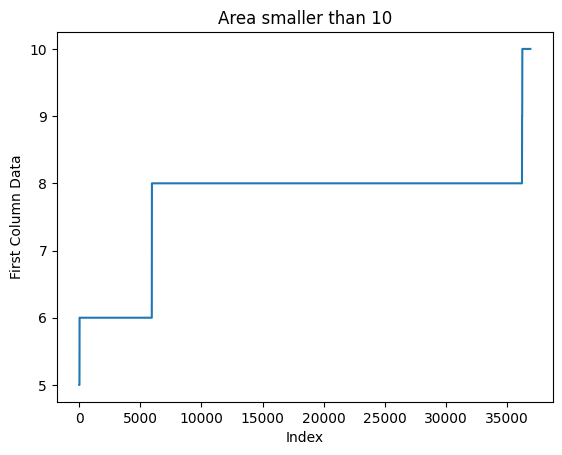

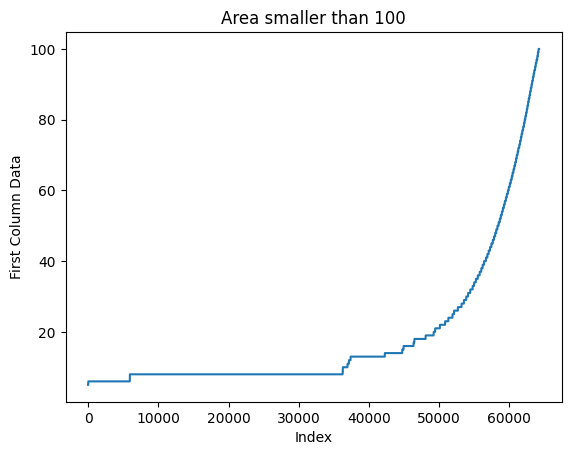

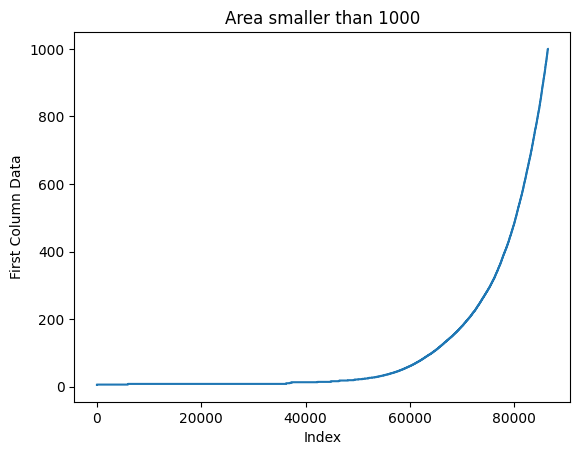

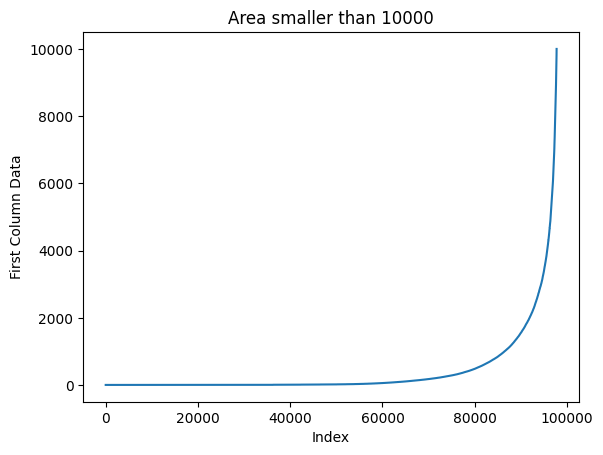

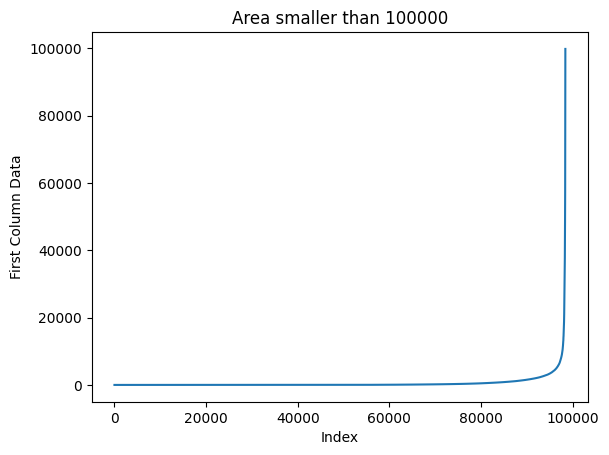

In [4]:
for filter_up in [10**exp for exp in range(1,6)]:
    
    df_combined = combine_data()
    df_sorted = df_combined['area'].sort_values()
    df_filtered = df_sorted[df_sorted <= filter_up]
    
    plt.figure()
    plt.plot(range(df_filtered.shape[0]), df_filtered)
    plt.xlabel('Index')
    plt.ylabel('First Column Data')
    plt.title(f'Area smaller than {filter_up}')
    plt.show()

### Cutting off too big and too small values

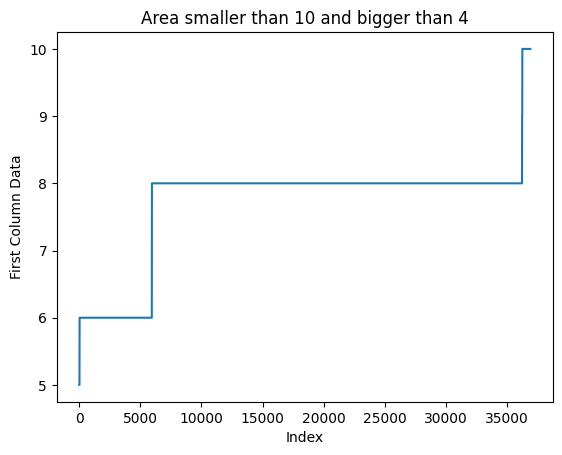

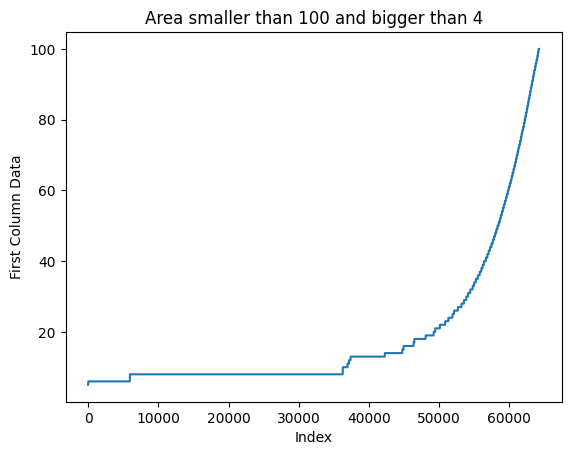

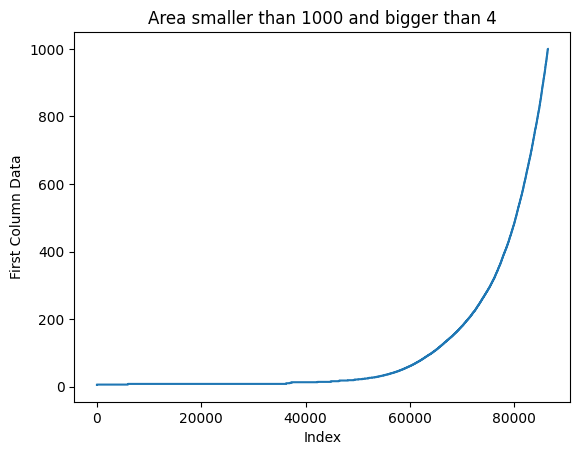

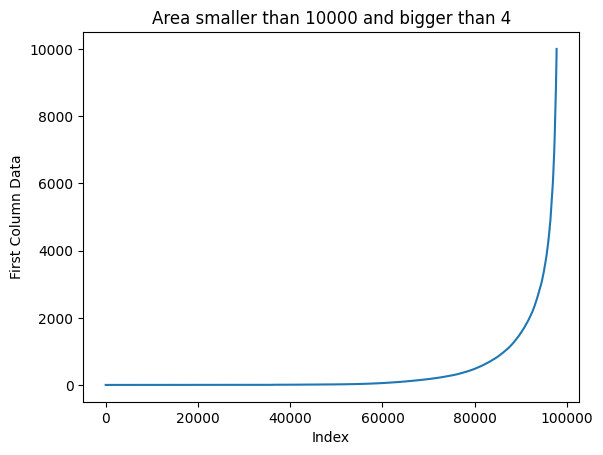

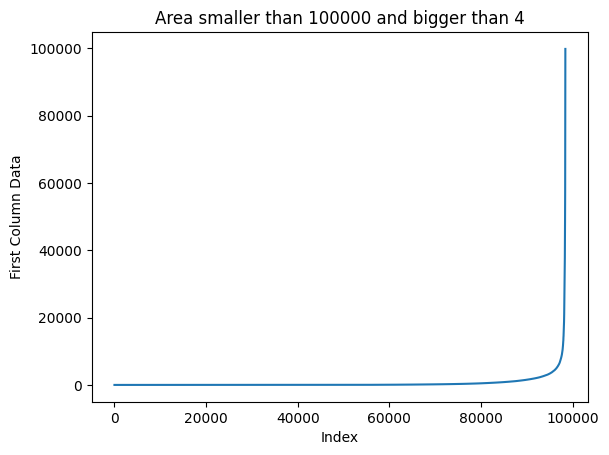

In [5]:
for filter_up in [10**exp for exp in range(1,6)]:

    filter_down = 4
    df_combined = combine_data()
    df_sorted = df_combined['area'].sort_values()
    df_filtered = df_sorted[(df_sorted <= filter_up) & (df_sorted > filter_down)] 
    
    plt.figure()
    plt.plot(range(df_filtered.shape[0]), df_filtered)
    plt.xlabel('Index')
    plt.ylabel('First Column Data')
    plt.title(f'Area smaller than {filter_up} and bigger than 4')
    plt.show()

In [6]:
df_combined = combine_data()
df_sorted = df_combined['area'].sort_values()
filter_up = 0
df_filtered = df_sorted[df_sorted >= filter_up]
print(colored(df_filtered.shape, 'white'))

(98428,)


# cords

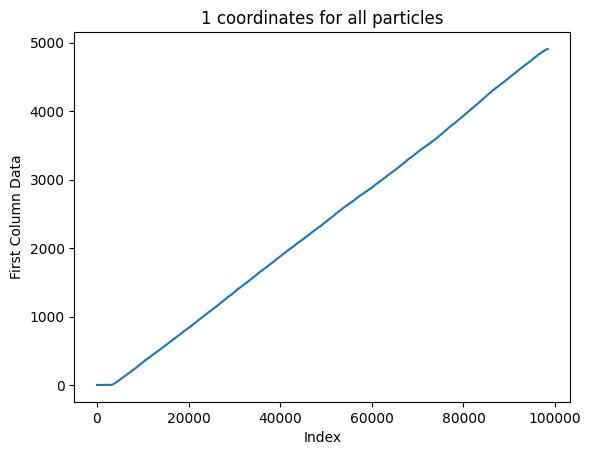

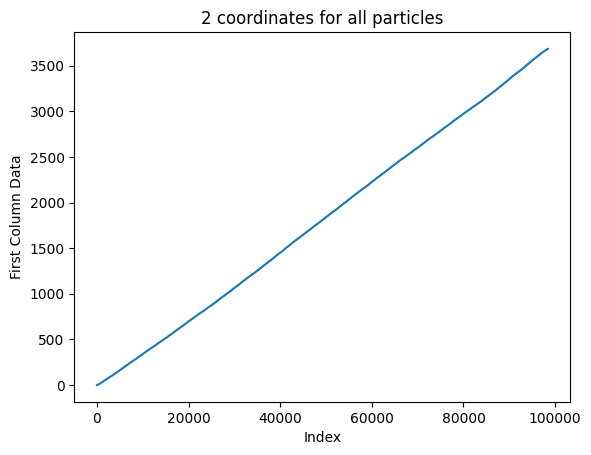

In [7]:
for i in range(2):
    df_combined = combine_data()
    df_sorted = pd.DataFrame([elm[i] for elm in df_combined['centroid'].apply(literal_eval)])[0].sort_values()
    
    plt.figure()
    plt.plot(range(df_sorted.shape[0]), df_sorted)
    plt.xlabel('Index')
    plt.ylabel('First Column Data')
    plt.title(f'{i + 1} coordinates for all particles')
    plt.show()

# Correlation between position and area

In [8]:
# df_combined = combine_data()
# df_area = df_combined['area']
# df_xcord = pd.DataFrame([elm[0] for elm in df_combined['centroid'].apply(literal_eval)])[0]
# df_ycord = pd.DataFrame([elm[1] for elm in df_combined['centroid'].apply(literal_eval)])[0]

# plt.figure()
# plt.plot(range(df_combined.shape[0]), df_xcord)
# plt.plot(range(df_combined.shape[0]), df_ycord)
# plt.plot(range(df_combined.shape[0]), df_area / 1e2)
# plt.xlabel('Index')
# plt.ylabel('First Column Data')
# plt.title(f'all data')
# plt.show()

## Heatmap

In [9]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# from ast import literal_eval
# from scipy.ndimage import convolve

# # Assuming combine_data() returns the DataFrame
# df = combine_data()

# # Extract 'x' and 'y' columns from 'centroid'
# df[['x', 'y']] = pd.DataFrame(df['centroid'].apply(literal_eval).tolist(), index=df.index)

# # Drop rows with NaN values (if needed)
# df = df[['x', 'y']].dropna()

# # Convert 'x' and 'y' columns to numeric types (if needed)
# df[['x', 'y']] = df[['x', 'y']].astype(float)

# # Create a heatmap using seaborn with density representation
# heatmap_data = df.groupby(['y', 'x']).size().unstack(fill_value=0)
# # heatmap_data
# # Increase the size of each point by adding a circular kernel
# kernel_size = 100  # Adjust the size of the circular kernel as needed
# kernel = np.zeros((kernel_size, kernel_size))
# y, x = np.ogrid[-kernel_size // 2: kernel_size // 2, -kernel_size // 2: kernel_size // 2]
# mask = x**2 + y**2 <= (kernel_size // 2)**2
# kernel[mask] = 1

# # heatmap_data = convolve(heatmap_data.values, kernel, mode='constant', cval=0)

# # Plot the smoothed heatmap
# sns.heatmap(heatmap_data, cmap='viridis')
# plt.title('Heatmap of Coordinates (Density)')
# plt.show()



Nie był to najlepszy pomysł

## Hexbin

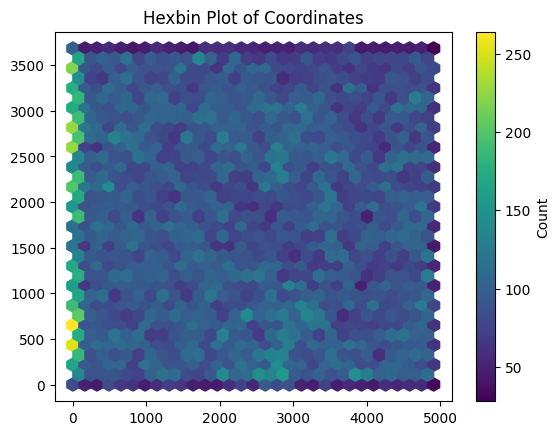

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming combine_data() returns the DataFrame
df = combine_data()

# Extract 'x' and 'y' columns from 'centroid'
df[['x', 'y']] = pd.DataFrame(df['centroid'].apply(literal_eval).tolist(), index=df.index)

# Drop rows with NaN values (if needed)
df = df[['x', 'y']].dropna()

# Convert 'x' and 'y' columns to numeric types (if needed)
df[['x', 'y']] = df[['x', 'y']].astype(float)

# Create a hexbin plot
plt.hexbin(df['x'], df['y'], gridsize=30, cmap='viridis', mincnt=1)
plt.colorbar(label='Count')
plt.title('Hexbin Plot of Coordinates')
plt.show()


## Histogram 2D

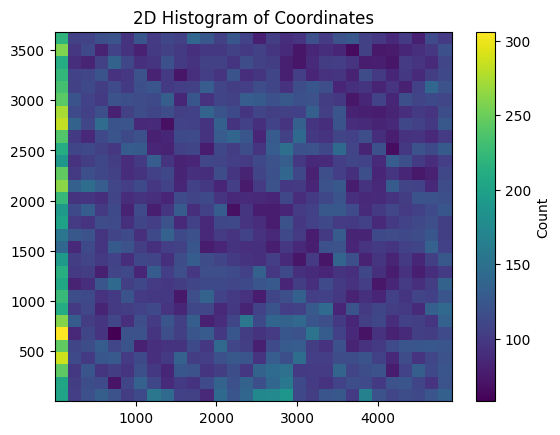

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming combine_data() returns the DataFrame
df = combine_data()

# Extract 'x' and 'y' columns from 'centroid'
df[['x', 'y']] = pd.DataFrame(df['centroid'].apply(literal_eval).tolist(), index=df.index)

# Drop rows with NaN values (if needed)
df = df[['x', 'y']].dropna()

# Convert 'x' and 'y' columns to numeric types (if needed)
df[['x', 'y']] = df[['x', 'y']].astype(float)

# Create a 2D histogram
plt.hist2d(df['x'], df['y'], bins=(30, 30), cmap='viridis')
plt.colorbar(label='Count')
plt.title('2D Histogram of Coordinates')
plt.show()


## Density countur plot

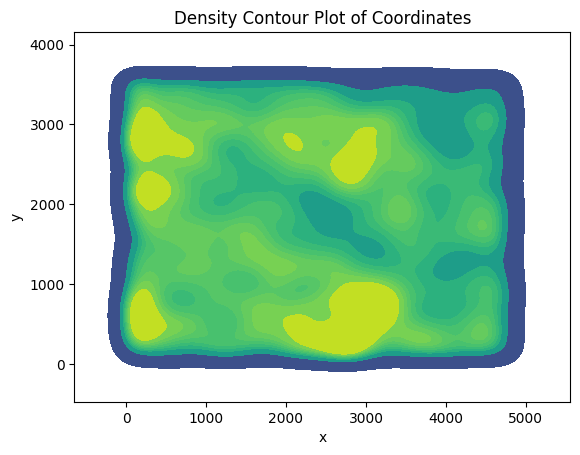

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming combine_data() returns the DataFrame
df = combine_data()

# Extract 'x' and 'y' columns from 'centroid'
df[['x', 'y']] = pd.DataFrame(df['centroid'].apply(literal_eval).tolist(), index=df.index)

# Drop rows with NaN values (if needed)
df = df[['x', 'y']].dropna()

# Convert 'x' and 'y' columns to numeric types (if needed)
df[['x', 'y']] = df[['x', 'y']].astype(float)

# Create a density contour plot
sns.kdeplot(x=df['x'], y=df['y'], cmap='viridis', fill=True)
plt.title('Density Contour Plot of Coordinates')
plt.show()


Ten wykres razem z dodatkowym wymiarem na wielkość cząstek może być traktowany jako funkcja celu.

Dodatkowo, symulacja może wyglądać w podobny sposób, gdzie kolor i wysokość grafu określają prawdopodobieństwa pozycji określonej cząstki i liczby cząstek w każdym miejscu.

## Including area

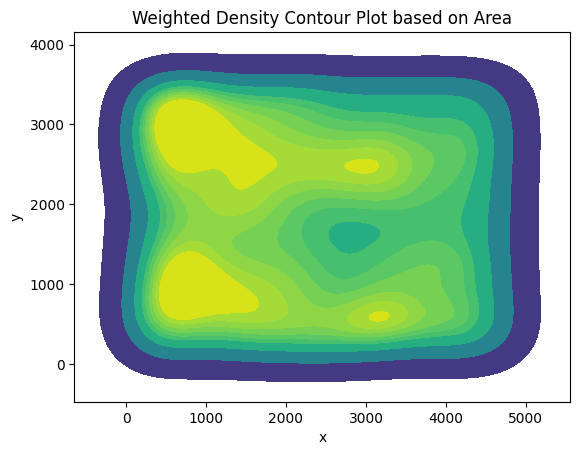

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ast import literal_eval  # Assuming you need this for the 'literal_eval' function

# Assuming combine_data() returns the DataFrame
df = combine_data()

# Extract 'x' and 'y' columns from 'centroid'
df[['x', 'y']] = pd.DataFrame(df['centroid'].apply(literal_eval).tolist(), index=df.index)

# Drop rows with NaN values (if needed)
df = df[['x', 'y', 'area']].dropna()

# Convert 'x' and 'y' columns to numeric types (if needed)
df[['x', 'y', 'area']] = df[['x', 'y', 'area']].astype(float)

# Create a weighted density contour plot
sns.kdeplot(x=df['x'], y=df['y'], cmap='viridis', fill=True, weights=df['area'])
plt.title('Weighted Density Contour Plot based on Area')
plt.show()


Ten wykres może być użyty jako reprezentacja funkcji celu.

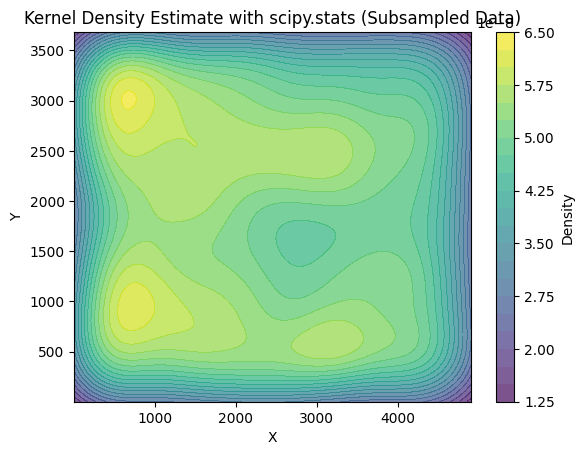

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ast import literal_eval
from scipy.stats import gaussian_kde
import numpy as np

# Assuming combine_data() returns the DataFrame
df = combine_data()

# Extract 'x' and 'y' columns from 'centroid'
df[['x', 'y']] = pd.DataFrame(df['centroid'].apply(literal_eval).tolist(), index=df.index)

# Drop rows with NaN values (if needed)
df = df[['x', 'y', 'area']].dropna()

# Convert 'x' and 'y' columns to numeric types (if needed)
df[['x', 'y', 'area']] = df[['x', 'y', 'area']].astype(float)

# Subsample the data
# sample_df = df.sample(n=5000)  # Adjust the sample size as needed

# Compute the kernel density estimate with scipy.stats
kde = gaussian_kde(df[['x', 'y']].T, weights=df['area'])

# Create a grid of values for evaluation
xv, yv = np.meshgrid(np.linspace(df['x'].min(), df['x'].max(), int(0.05*10**4)),
                    np.linspace(df['y'].min(), df['y'].max(), int(0.05*10**4)))

# Evaluate the kernel density estimate on the grid
zv = kde(np.vstack([xv.ravel(), yv.ravel()]))

# Reshape the result to match the grid
zv = zv.reshape(xv.shape)

# Visualize the result using Matplotlib
plt.contourf(xv, yv, zv, cmap='viridis', levels=20, alpha=0.7)
plt.colorbar(label='Density')
# plt.scatter(sample_df['x'], sample_df['y'], c=sample_df['area'], cmap='viridis', s=20, edgecolors='k', linewidths=0.5)
plt.title('Kernel Density Estimate with scipy.stats (Subsampled Data)')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


### Getting csv with resulted cost function

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ast import literal_eval
from scipy.stats import gaussian_kde
import numpy as np

# Assuming combine_data() returns the DataFrame
df = combine_data()

# Extract 'x' and 'y' columns from 'centroid'
df[['x', 'y']] = pd.DataFrame(df['centroid'].apply(literal_eval).tolist(), index=df.index)

# Drop rows with NaN values (if needed)
df = df[['x', 'y', 'area']].dropna()

# Convert 'x' and 'y' columns to numeric types (if needed)
df[['x', 'y', 'area']] = df[['x', 'y', 'area']].astype(float)

# Subsample the data
# sample_df = df.sample(n=5000)  # Adjust the sample size as needed

# Compute the kernel density estimate with scipy.stats
kde = gaussian_kde(df[['x', 'y']].T, weights=df['area'])

# Create a grid of values for evaluation
xv, yv = np.meshgrid(np.linspace(df['x'].min(), df['x'].max(), int(0.05*10**4)),
                    np.linspace(df['y'].min(), df['y'].max(), int(0.05*10**4)))

# Evaluate the kernel density estimate on the grid
zv = kde(np.vstack([xv.ravel(), yv.ravel()]))

# Reshape the result to match the grid
zv = zv.reshape(xv.shape)

# Save the density values to a CSV file
density_df = pd.DataFrame({'x': xv.ravel(), 'y': yv.ravel(), 'density': zv.ravel()})
density_df.to_csv('density_values.csv', index=False)

### Visualization of density data

In [34]:
df = pd.read_csv('../../data_postprocessing/density_values.csv')
df.head()

,x,y,density
0,1.000000,1.0,0.153218
1,10.837675,1.0,0.156163
2,20.675351,1.0,0.159103
3,30.513026,1.0,0.162036
4,40.350701,1.0,0.164960


In [38]:
df = pd.read_csv('../../data_postprocessing/density_values.csv')
df = df[df['density'] > 0.6]
print(colored(df.shape[0], 'white'))

5528


In [32]:
# df = pd.read_csv('../../../density_values.csv')
# df['density'] *= 1e7
# df.to_csv('../../../density_values.csv', index=False)
# df.head()

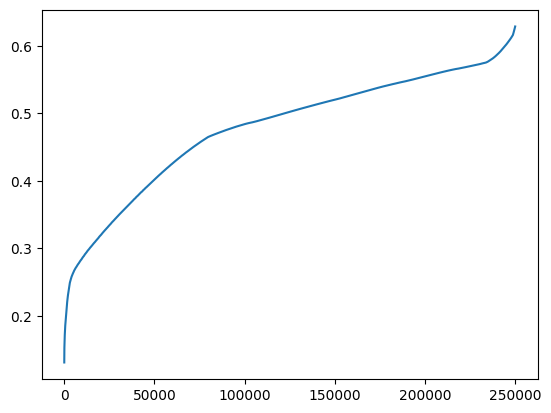

In [50]:
df = pd.read_csv('../../data_postprocessing/density_values.csv')
# df = df.sample(n=5000)
plt.plot(range(df['density'].shape[0]), df['density'].sort_values())
plt.show()

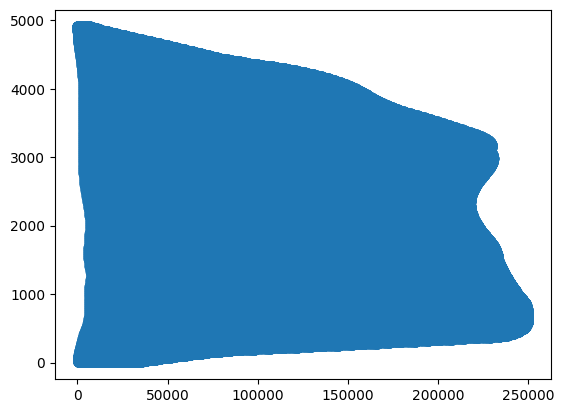

In [57]:
df = pd.read_csv('../../data_postprocessing/density_values.csv')
df = df.sort_values('density')
plt.scatter(range(df['x'].shape[0]), df['x'])
plt.show()